In [8]:
%%pyspark
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyspark.sql.types import DoubleType, IntegerType

StatementMeta(projetpfe, 2, 8, Finished, Available, Finished)

Injection CSV

In [9]:
df = spark.read.load('abfss://csv@storagediabetes.dfs.core.windows.net/product_final.csv', format='csv', Header = True)

StatementMeta(projetpfe, 2, 9, Finished, Available, Finished)

Enlever les valeurs nuls

In [10]:
df.na.drop()

StatementMeta(projetpfe, 2, 10, Finished, Available, Finished)

DataFrame[product_id: string, price: string, product_category_name: string, product_name_lenght: string, product_description_lenght: string, product_photos_qty: string, product_weight_g: string, product_length_cm: string, product_height_cm: string, product_width_cm: string, review_score: string]

trasformer le datafram en datafram pandas pour utiliser les fonction plt

In [18]:
df = df.toPandas()

StatementMeta(projetpfe, 2, 18, Finished, Available, Finished)

AttributeError: 'DataFrame' object has no attribute 'toPandas'

In [19]:
df

StatementMeta(projetpfe, 2, 19, Finished, Available, Finished)

,product_id,price,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score
0,4244733e06e7ecb4970a6e2683c13e61,58.90,cool_stuff,58,598,4,650.0,28.0,9.0,14.0,5
1,e5f2d52b802189ee658865ca93d83a8f,239.90,pet_shop,56,239,2,30000.0,50.0,30.0,40.0,4
2,c777355d18b72b67abbeef9df44fd0fd,199.00,furniture_decor,59,695,2,3050.0,33.0,13.0,33.0,5
3,7634da152a4610f1595efa32f14722fc,12.99,perfumery,42,480,1,200.0,16.0,10.0,15.0,4
4,ac6c3623068f30de03045865e4e10089,199.90,garden_tools,59,409,1,3750.0,35.0,40.0,30.0,5
...,...,...,...,...,...,...,...,...,...,...,...
111681,4aa6014eceb682077f9dc4bffebc05b0,289.99,housewares,43,1002,3,10150.0,89.0,15.0,40.0,5
111682,32e07fd915822b0765e448c4dd74c828,360.00,computers_accessories,31,232,1,8950.0,45.0,26.0,38.0,5
111683,72a30483855e2eafc67aee5dc2560482,89.10,sports_leisure,43,869,1,967.0,21.0,24.0,19.0,5
111684,9c422a519119dcad7575db5af1ba540e,53.99,computers_accessories,56,1306,1,100.0,20.0,20.0,20.0,5


Changement de type de variable string -> X

In [17]:
df = df.withColumn("price", df["price"].cast(DoubleType())) \
       .withColumn("product_name_lenght", df["product_name_lenght"].cast(IntegerType())) \
       .withColumn("product_description_lenght", df["product_description_lenght"].cast(IntegerType())) \
       .withColumn("product_photos_qty", df["product_photos_qty"].cast(IntegerType())) \
       .withColumn("product_weight_g", df["product_weight_g"].cast(IntegerType())) \
       .withColumn("product_length_cm", df["product_length_cm"].cast(IntegerType())) \
       .withColumn("product_height_cm", df["product_height_cm"].cast(IntegerType())) \
       .withColumn("product_width_cm", df["product_width_cm"].cast(IntegerType())) \
       .withColumn("review_score", df["review_score"].cast(IntegerType())) 

StatementMeta(projetpfe, 2, 17, Finished, Available, Finished)

AttributeError: 'DataFrame' object has no attribute 'withColumn'

StatementMeta(projetpfe, 2, 39, Finished, Available, Finished)

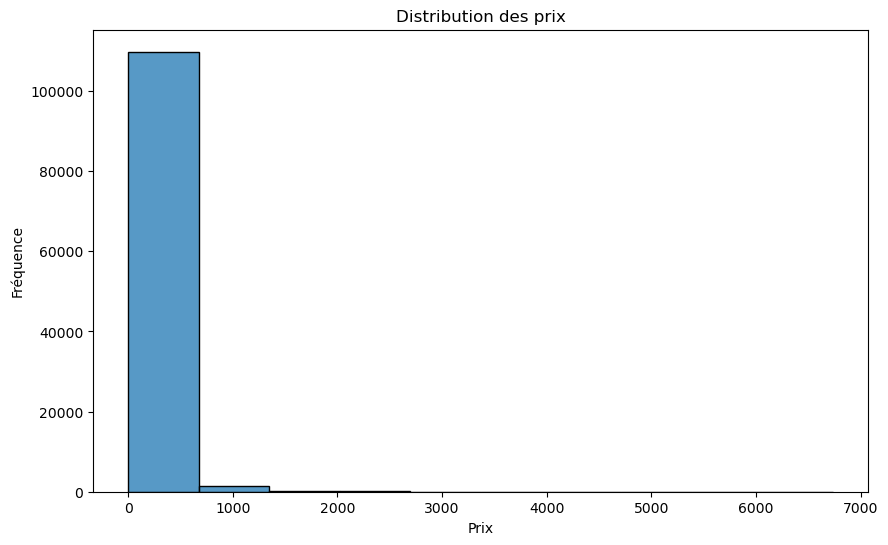

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df_pandas['price'], bins=10)
plt.title('Distribution des prix')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.show()


Dans ce graphique on peut voir la repartition des prix du dataset

In [35]:
categories_to_plot = df['product_category_name'].unique()[:5]  # Sélectionner les 5 premières catégories uniques
df_filtered = df[df['product_category_name'].isin(categories_to_plot)]


StatementMeta(projetpfe, 2, 35, Finished, Available, Finished)

StatementMeta(projetpfe, 2, 38, Finished, Available, Finished)

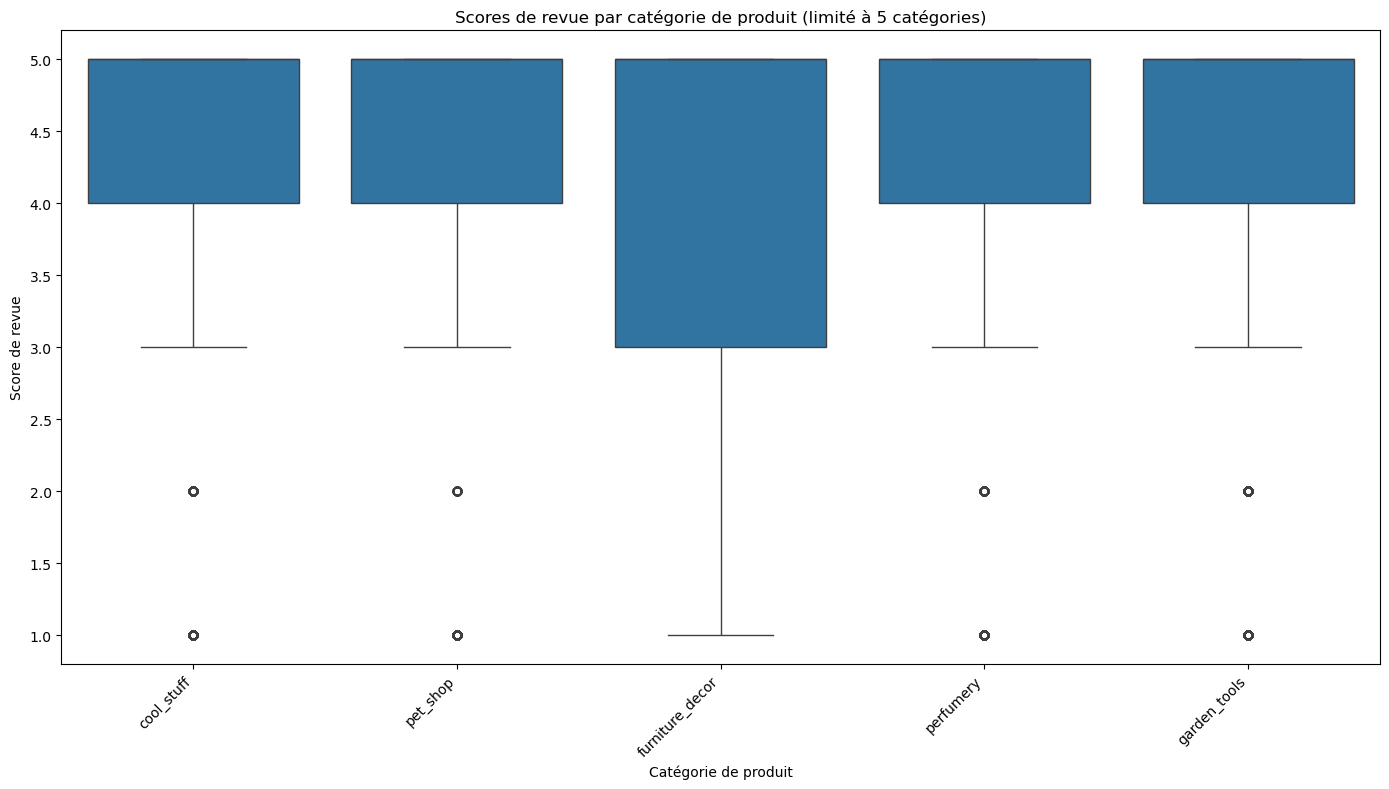

In [38]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='product_category_name', y='review_score', data=df_filtered)
plt.title('Scores de revue par catégorie de produit (limité à 5 catégories)')
plt.xlabel('Catégorie de produit')
plt.ylabel('Score de revue')
plt.xticks(rotation=45, ha="right")  # Rotation et alignement des étiquettes pour éviter le chevauchement
plt.tight_layout()  # Ajuste la mise en page pour éviter les chevauchements
plt.show()

StatementMeta(projetpfe, 2, 40, Finished, Available, Finished)

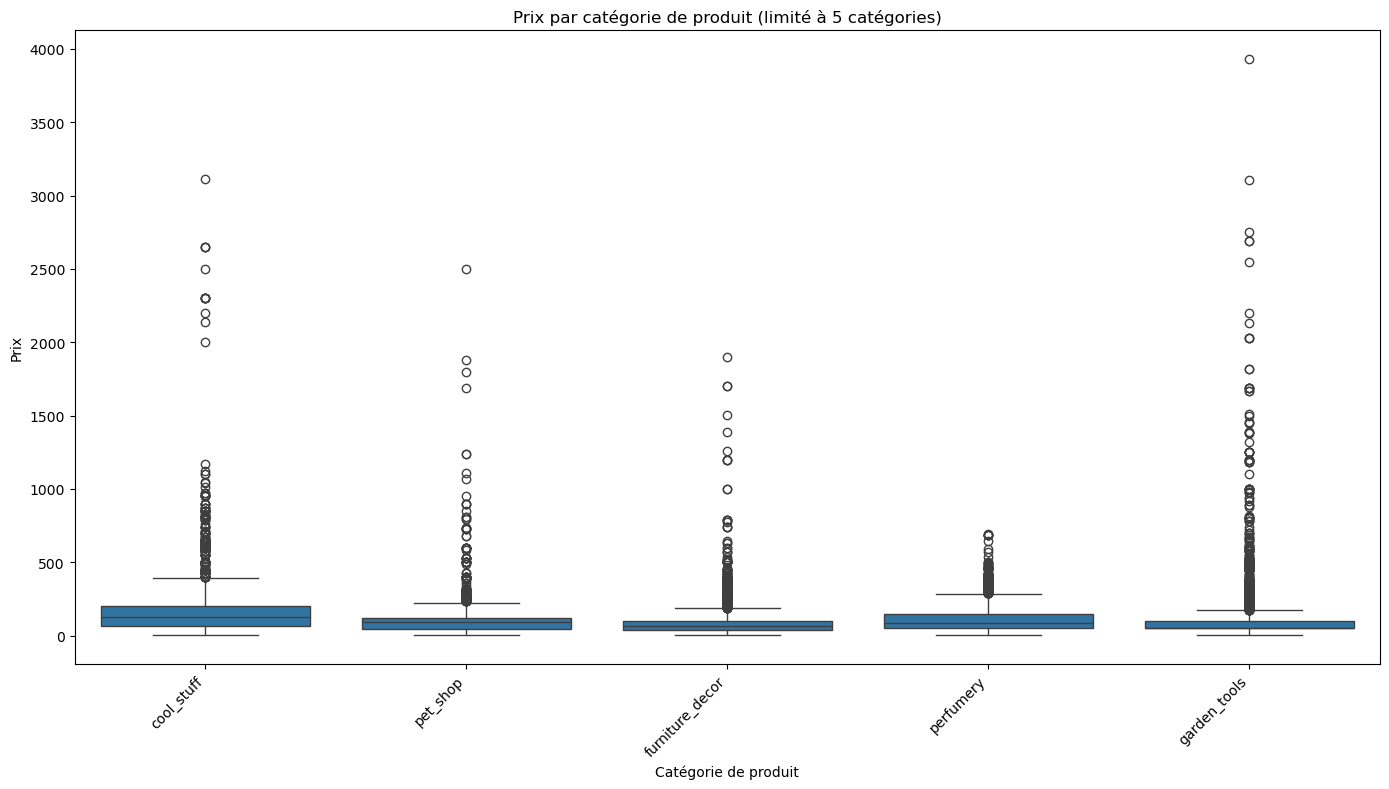

In [40]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='product_category_name', y='price', data=df_filtered)
plt.title('Prix par catégorie de produit (limité à 5 catégories)')
plt.xlabel('Catégorie de produit')
plt.ylabel('Prix')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

StatementMeta(projetpfe, 2, 41, Finished, Available, Finished)

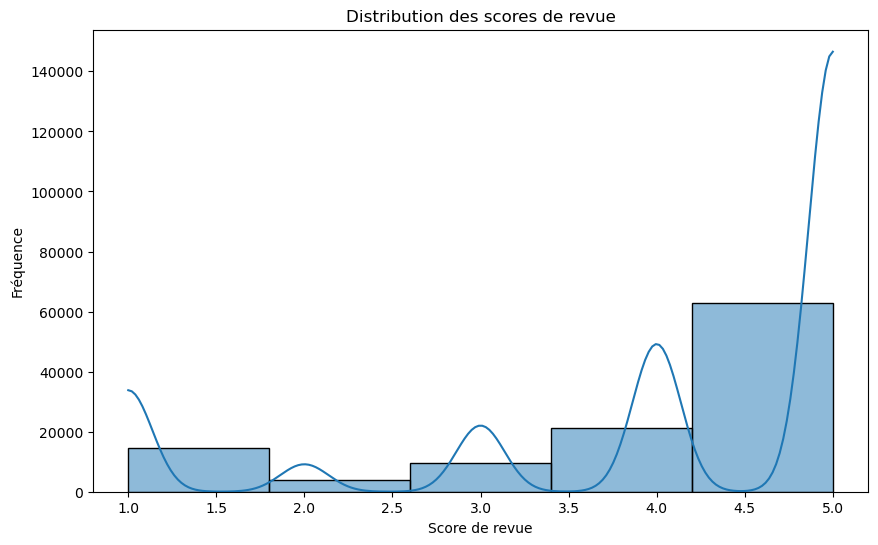

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(df_pandas['review_score'], bins=5, kde=True)
plt.title('Distribution des scores de revue')
plt.xlabel('Score de revue')
plt.ylabel('Fréquence')
plt.show()